### Load dataset

In [2]:
from matplotlib import pyplot as plt

In [3]:
import torch
from typing import List, Optional, Tuple, Union
from transformers import BertForSequenceClassification, BartForConditionalGeneration, T5ForConditionalGeneration

from transformers.modeling_outputs import SequenceClassifierOutput

In [4]:
from datasets import load_dataset

In [5]:
dataset = load_dataset("tau/scrolls", 'contract_nli')

Reusing dataset scrolls (/home/booydar/.cache/huggingface/datasets/tau___scrolls/contract_nli/1.0.0/672021d5d8e1edff998a6ea7a5bff35fdfd0ae243e7cf6a8c88a57a04afb46ac)
100%|██████████| 3/3 [00:00<00:00, 65.21it/s]


In [30]:
dataset = load_dataset("tau/scrolls", 'quality')

Dataset scrolls downloaded and prepared to /home/booydar/.cache/huggingface/datasets/tau___scrolls/quality/1.0.0/672021d5d8e1edff998a6ea7a5bff35fdfd0ae243e7cf6a8c88a57a04afb46ac. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 277.96it/s]


In [13]:
dataset['train'][300]

{'id': '105_nda-7',
 'pid': '105_nda-7_0',
 'input': 'Receiving Party may share some Confidential Information with some third-parties (including consultants, agents and professional advisors).\n\nNON-DISCLOSURE AGREEMENT\nTHIS NON-DISCLOSURE AGREEMENT (hereinafter referred to as the "Agreement") is entered into by and between Excelerate, Inc. a corporation organized and existing under the laws of the State of Alabama, (“Excelerate”) having its principal place of business at 1230 Slaughter Road, Suite F, Madison, AL 35758 U.S.A., and Burton Technical Group ("Second Party"), with its corporate office located at Company Address and each or both of which shall also hereinafter be referred to as the "Party" or "Parties," respectively.\nWHEREAS, the Parties represent that they control or may in the future control and have in their possession or may in the future possess valuable proprietary, confidential information as described in Paragraph 1 of this Agreement;\nWHEREAS, in order for the Pa

In [8]:
dataset['train'][0]['input']

"Receiving Party shall not reverse engineer any objects which embody Disclosing Party's Confidential Information.\n\nNON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT\nThis NON-DISCLOSURE AND CONFIDENTIALITY AGREEMENT (“Agreement”) is made by and between:\n(i) the Office of the United Nations High Commissioner for Refugees, having its headquarters located at 94 rue de Montbrillant, 1202 Geneva, Switzerland (hereinafter “UNHCR” or the “Discloser”); and\n(ii) ________________________ , a company established in accordance with the laws of ________________________ and having its principal offices located at ________________________________________________ (hereinafter the “Bidder” or the “Recipient”).\nThe Discloser and Recipient are also referred to collectively as the “Parties” and individually as a “Party”.\nRECITALS\nWHEREAS in connection with RFP/2014/620, Request for Proposal for the provision Off-the-shelf Soft-skill, IT Online and HR specific E-learning Courses (the “RFP”), it is advant

In [48]:
inds = [dataset['train'][i]['input'].find('\n\n\n') for i in range(500)]

(array([ 40., 104., 115., 131.,  85.,  18.,   4.,   2.,   0.,   1.]),
 array([ 29. , 119.2, 209.4, 299.6, 389.8, 480. , 570.2, 660.4, 750.6,
        840.8, 931. ]),
 <BarContainer object of 10 artists>)

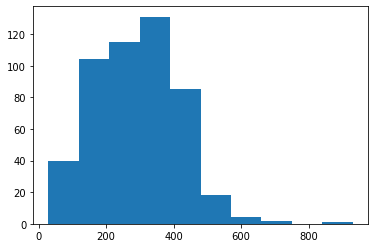

In [52]:
plt.hist(inds)

In [4]:
with open('quality_example.txt', 'r') as f:
    t = f.read()

In [67]:
import numpy as np
np.where(torch.zeros(10) == 0)[0][0]


0

In [68]:
slice = t[:500]

In [73]:
d_pos

(220,)

In [76]:
tokenizer.encode_plus(slice[:d_pos + dot_pos])

{'input_ids': [363, 656, 2846, 2370, 77, 46, 91, 3299, 16, 8, 915, 239, 58, 41, 188, 61, 216, 19, 231, 2749, 145, 8, 880, 13, 8, 2074, 5, 41, 279, 61, 216, 9460, 7, 126, 2673, 24, 228, 1172, 112, 533, 5, 41, 254, 61, 978, 809, 19, 341, 1676, 6, 11, 3, 88, 2620, 614, 161, 5, 41, 308, 61, 216, 341, 2112, 7, 9832, 11, 701, 4820, 114, 8, 2045, 1605, 787, 12, 925, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [75]:
d_pos = slice.find('(D)')
dot_pos = slice[d_pos:].find('.')
slice[d_pos + dot_pos]

'.'

In [29]:
# ' '.join(t.split(' ')[:512])

In [6]:
tokenized = tokenizer.encode(t, max_length=1024, truncation=True)

In [66]:
tokenizer.encode('\n\n\n'), tokenizer.encode(''), tokenizer.encode('(D)')

([1], [1], [41, 308, 61, 1])

In [57]:
dot_id = tokenizer.encode('.')[1]

In [58]:
tokenized.index(dot_id)

26

In [8]:
tokenized[:50]

[363,
 656,
 2846,
 2370,
 77,
 46,
 91,
 3299,
 16,
 8,
 915,
 239,
 58,
 41,
 188,
 61,
 216,
 19,
 231,
 2749,
 145,
 8,
 880,
 13,
 8,
 2074,
 5,
 41,
 279,
 61,
 216,
 9460,
 7,
 126,
 2673,
 24,
 228,
 1172,
 112,
 533,
 5,
 41,
 254,
 61,
 978,
 809,
 19,
 341,
 1676,
 6]

In [33]:
len(t.split(' '))

4829

In [39]:
len(tokenized)

1024

In [44]:
list(enumerate(range(5)))[::-1]

[(4, 4), (3, 3), (2, 2), (1, 1), (0, 0)]

In [1]:
tokenizer.decode(tokenized)

NameError: name 'tokenizer' is not defined

In [27]:
' '.join(t.split(' ')[512:1024])

'was grinning inwardly. There wasn\'t anything they could do. He had them now. He had enough Basic to keep him comfortably, by his standards, for the rest of his life. He was never going to subject himself to space cafard again. Just thinking about it, now, set the tic to going at the side of his mouth. They could count down and blast off, for all he gave a damn. The gold watch idea had been that of Lofting Gubelin, which was typical, he being in the way of a living anachronism himself. In fact, Academician Gubelin was possibly the only living man on North America who still wore spectacles. His explanation was that a phobia against having his eyes touched prohibited either surgery to remould his eyeballs and cure his myopia, or contact lenses. That was only an alibi so far as his closest associate, Hans Girard-Perregaux, was concerned. Doctor Girard-Perregaux was convinced Gubelin would have even worn facial hair, had he but a touch more courage. Gubelin longed for yesteryear, a seldom

In [15]:
# pretrained_model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
# pretrained_model = T5ForConditionalGeneration.from_pretrained("t5-base")

In [16]:
# pretrained_model.encoder.block[0].layer[0].SelfAttention.q

In [17]:
# pretrained_model.model.encoder.embed_tokens.weight

In [56]:
pretrained_model.model.shared

Embedding(50265, 768, padding_idx=1)

In [61]:
pretrained_model.model.encoder.layers[0].self_attn.k_proj.weight

Parameter containing:
tensor([[-0.0396,  0.1533, -0.0428,  ..., -0.0316,  0.1415,  0.0479],
        [ 0.0189, -0.0148,  0.1171,  ...,  0.0793,  0.0303,  0.0619],
        [ 0.0919,  0.0036,  0.0454,  ..., -0.0061,  0.0180, -0.0290],
        ...,
        [ 0.0406,  0.0953,  0.0361,  ..., -0.0677, -0.0262, -0.0538],
        [ 0.0719,  0.1156, -0.0101,  ...,  0.0600,  0.0103, -0.0804],
        [ 0.1002, -0.1005, -0.0149,  ..., -0.0311,  0.0263,  0.0912]],
       requires_grad=True)

In [53]:
pretrained_model.model.encoder.get_input_embeddings().weight


Parameter containing:
tensor([[ 0.0125,  0.0014, -0.0096,  ...,  0.0022,  0.1057,  0.0103],
        [-0.0114, -0.0169, -0.0184,  ..., -0.0131, -0.0043, -0.0053],
        [ 0.0842, -0.0389,  0.0096,  ...,  0.0583,  0.0082,  0.0357],
        ...,
        [ 0.0141, -0.0241, -0.0207,  ..., -0.0046,  0.0241, -0.0071],
        [ 0.0071, -0.0391, -0.0273,  ...,  0.0055,  0.0131, -0.0042],
        [ 0.0012,  0.0042, -0.0230,  ...,  0.0065, -0.0083,  0.0180]],
       requires_grad=True)

In [ ]:
pretrained_model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseReluDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dr

In [3]:
dataset = load_dataset("yelp_review_full")

Reusing dataset yelp_review_full (/home/booydar/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf)
100%|██████████| 2/2 [00:00<00:00, 13.59it/s]


In [17]:
pretrained_model.encoder.resize_token_embeddings(31230)

Embedding(31230, 768)

In [18]:
pretrained_model.encoder.embed_tokens

Embedding(31230, 768)

In [14]:
tokenizer.eos_token_id

1

In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("t5-base")
# tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")

In [19]:
tokenizer.decode([0])

'<s>'

In [20]:
tokenizer.sep_token_id

2

In [20]:
ids = tokenizer.encode_plus('I love rats.', add_special_tokens=True, padding='max_length', max_length=20)['input_ids']
tokenizer.decode(ids)

'I love rats.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [17]:
ids

[27, 333, 20063, 5, 1]

In [26]:
num_segments = 2
num_mem_tokens = 10

tokenizer.model_max_length  = (tokenizer.model_max_length - num_mem_tokens) * num_segments
tokenizer.padding_side = 'left'

In [27]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Loading cached processed dataset at /home/booydar/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf/cache-b83c89ca994b964f.arrow
Loading cached processed dataset at /home/booydar/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf/cache-79cae018cf33be2d.arrow


In [28]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

Loading cached shuffled indices for dataset at /home/booydar/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf/cache-13eb503c718d339c.arrow
Loading cached shuffled indices for dataset at /home/booydar/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf/cache-0de892a126228ab3.arrow


In [29]:
gen = iter(small_eval_dataset)
src = next(gen)

### Finetune

In [30]:
from transformers import AutoModelForSequenceClassification

### ToDo
* mb store smth for bptt?
* does altering embedding weights parameter work?

In [31]:
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler

In [32]:
# import torch
# import torch.nn.functional as F
# from typing import List, Optional, Tuple, Union
# from transformers import BertForSequenceClassification

# class RMBertForSequenceClassification(BertForSequenceClassification):
#     def __init__(self, config):
#         super().__init__(config)

#     def set_mem_tokens(self, num_mem_tokens):
#         if num_mem_tokens is not None:
#             embedding_weights = self.bert.embeddings.word_embeddings.weight.data
#             embedding_weights = F.pad(embedding_weights, (0, 0, 0, num_mem_tokens), "constant", 0)
#             embedding_weights[-num_mem_tokens:] = torch.rand(num_mem_tokens, *embedding_weights.shape[1:]) * 2 - 0.5
#             self.bert.embeddings.word_embeddings.weight.data = embedding_weights
            
#             if self.bert.embeddings.word_embeddings.weight.grad is not None:
#                 embedding_grad = self.bert.embeddings.word_embeddings.weight.grad.data
#                 embedding_grad = F.pad(embedding_grad, (0, 0, 0, num_mem_tokens), "constant", 0)
#                 self.bert.embeddings.word_embeddings.grad.data = embedding_grad


#     def __call__(self, **kwargs):
#         seg_num = 2
#         segmented_kwargs = {}
#         for arg, value in kwargs.items():
#             if isinstance(value, torch.Tensor) and value.ndim > 1:
#                 segmented_kwargs[arg] = torch.chunk(value, seg_num, dim=-1) 
#                 print(segmented_kwargs[arg][0].shape)
#             else:
#                 segmented_kwargs[arg] = [value] * seg_num

#         for seg_values in list(zip(*segmented_kwargs.values())):
#             seg_kwargs = dict(zip(segmented_kwargs.keys(), seg_values))
#             print('forwarding')
#             # self.forward( **seg_kwargs)
#         return self.forward( **seg_kwargs)

# def __call__(self, return_memory=False, **kwargs):
#         if self.memory is None:
#             self.set_memory()

#         segmented_kwargs = {}
#         for arg, value in kwargs.items():
#             if isinstance(value, torch.Tensor) and value.ndim > 1:
#                 segmented_kwargs[arg] = torch.chunk(value, self.n_segment, dim=-1) 
#                 # print(segmented_kwargs[arg][0].shape)
#             else:
#                 segmented_kwargs[arg] = [value] * self.n_segment

#         # print('segmented_kwargs ', [(i,len(j), j[0].shape) for i,j in segmented_kwargs.items()])
#         for seg_values in list(zip(*segmented_kwargs.values())):
#             seg_kwargs = dict(zip(segmented_kwargs.keys(), seg_values))
            
            
#             if seg_kwargs['input_ids'] is not None:
#                 input_embeds = self.net.embeddings.word_embeddings(seg_kwargs.pop('input_ids'))
#                 # print('input_embeds.shape ', input_embeds.shape)
#             else:
#                 input_embeds = seg_kwargs.pop('input_embeds')
            
#             if self.memory.ndim == 2:
#                 self.memory = self.memory.repeat(input_embeds.shape[0], 1, 1)
#             seg_kwargs['inputs_embeds'] = torch.hstack((self.memory, input_embeds))
            
#             type_ids = seg_kwargs['token_type_ids']
#             type_ids_pad = torch.ones(type_ids.shape[0], self.num_mem_tokens, dtype=type_ids.dtype, device=type_ids.device)
#             seg_kwargs['token_type_ids'] = torch.hstack((type_ids_pad, type_ids))

#             attn_mask = seg_kwargs['attention_mask']
#             attn_mask_pad = torch.ones(attn_mask.shape[0], self.num_mem_tokens, dtype=attn_mask.dtype, device=attn_mask.device)
#             seg_kwargs['attention_mask'] = torch.hstack((attn_mask_pad, attn_mask))

#             # print(seg_kwargs)
#             out = self.model.forward(**seg_kwargs)
#             print('Out ', out, out.hidden_states[0].shape, out.hidden_states[0][:self.num_mem_tokens].shape)
#             print('self memory ', self.memory.shape)

#         if return_memory:
#             return out, self.memory
#         self.reset_memory()
        
#         return out

In [33]:
# tokenizer.tokenize('Hello![SEP][MEM11]')

In [34]:
src.keys()

dict_keys(['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'])

In [35]:
# src['attention_mask']

In [36]:
storage = None

In [37]:
import torch
import torch.nn.functional as F
from typing import List, Optional, Tuple, Union
from transformers import PreTrainedModel, AutoModelForSequenceClassification

import math

SEGMENTABLE = ['input_ids', 'inputs_embeds', 'token_type_ids', 'position_ids', 'attention_mask']
PAD_ZEROS = ['token_type_ids', 'attention_mask']

NET_ATTRIBUTE = 'bert'
class RMTEncoderForSequenceClassification():
    def __init__(self, config=None, base_model=None):
        if config is not None:
            self.model = AutoModelForSequenceClassification(config)
        
        if base_model is not None:
            self.model = base_model

        self.net = getattr(self.model, NET_ATTRIBUTE)
        self.num_mem_tokens = 0


    def from_pretrained(from_pretrained):
        base_model = AutoModelForSequenceClassification.from_pretrained(from_pretrained)
        rmt = RMTEncoderForSequenceClassification(base_model=base_model)
        return rmt
        

    def set_mem_tokens(self, num_mem_tokens):
        self.num_mem_tokens = num_mem_tokens
        self.extend_word_embeddings()


    def set_memory(self, memory=None):
        if memory is None:
            mem_token_ids = self.mem_token_ids.to(device=self.device)
            # print('mem_token_ids', mem_token_ids.shape)
            memory = self.net.embeddings.word_embeddings(mem_token_ids)
        return memory


    def extend_word_embeddings(self):
        vocab_size = self.net.embeddings.word_embeddings.weight.shape[0]
        extended_vocab_size = vocab_size + self.num_mem_tokens + 1
        self.mem_token_ids = torch.arange(vocab_size, vocab_size + self.num_mem_tokens)
        self.pad_token_id = vocab_size + self.num_mem_tokens
        self.net.resize_token_embeddings(extended_vocab_size)


    def __call__(self, memory=None, return_memory=False, **kwargs):
        # if self.num_mem_tokens == 0:
        #     return self.model.forward(**kwargs)
        
        memory = self.set_memory(memory)
        
        segmented_kwargs = self.pad_and_segment(**kwargs)
        for seg_kwargs in segmented_kwargs:
            # print('mem_tokens gradient ', self.net.embeddings.word_embeddings.weight.shape, self.net.embeddings.word_embeddings.weight.grad[:, -self.num_mem_tokens:].sum(dim=0))
            if seg_kwargs['input_ids'] is not None:
                saved_input_ids = seg_kwargs['input_ids']
                input_embeds = self.net.embeddings.word_embeddings(seg_kwargs.pop('input_ids'))
            else:
                input_embeds = seg_kwargs.pop('input_embeds')
            
            if memory.ndim == 2:
                memory = memory.repeat(input_embeds.shape[0], 1, 1)
            # print('inputs_embed shape', input_embeds.shape)
            # print('memory shape', memory.shape)
            seg_kwargs['inputs_embeds'] = torch.hstack((memory, input_embeds))
            # print('seg kwargs keys', seg_kwargs.keys())
            # print('seg_kwargs[inputs_embeds] shape', seg_kwargs['inputs_embeds'].shape)
            
            out = self.model.forward(**seg_kwargs, output_hidden_states=True)
            memory = out.hidden_states[-1][:, :self.num_mem_tokens]

        if return_memory:
            return out, memory
        # print("end of task")
        return out

    def pad_and_segment(self, **kwargs):

        context_size = self.net.embeddings.position_embeddings.weight.shape[0] - self.num_mem_tokens

        if 'input_ids' in kwargs:
            sequence_len = kwargs['input_ids'].shape[1]
        elif 'input_embeds' in kwargs:
            sequence_len = kwargs['input_embeds'].shape[1]
        else:
            raise(ValueError)

        n_segments = math.ceil(sequence_len / context_size)
        # print('sequence_len ', sequence_len)
        # print('context_size ', context_size)
        # print(f'split to {n_segments} segments')

        segmented_kwargs = {}
        for label, value in kwargs.items():
            if label in SEGMENTABLE and isinstance(value, torch.Tensor):
                pad_length = n_segments * context_size - value.shape[1]
                padded_value = self.pad(label, value, pad_length)

                segmented_value = list(torch.chunk(padded_value, n_segments, dim=1) )
                
                if label not in {'input_ids', 'input_embeds'}:
                    for i, seg in enumerate(segmented_value):
                        segmented_value[i] = self.pad(label, seg, self.num_mem_tokens)
                segmented_kwargs[label] = segmented_value
            else:
                segmented_kwargs[label] = [value] * n_segments
        
        segmented_kwargs = [dict(zip(segmented_kwargs.keys(), seg_values)) for seg_values in zip(*segmented_kwargs.values())]
        # print('segmented_kwargs', segmented_kwargs)
        return segmented_kwargs


    def pad(self, label, value, pad_length):
        # if pad_length == 0:
        #     return value

        if label in PAD_ZEROS:
            pad_value = 0
        elif label == 'input_ids':
            pad_value = self.pad_token_id
        elif label == 'input_embeds':
            pad_value = self.net.embeddings.word_embeddings(self.pad_token_id.to(device=self.device))

        padded_value = F.pad(value, (pad_length, 0, 0, 0), "constant", pad_value)
        return padded_value


    def to(self, device):
        self.model = self.model.to(device)
        
    
    def cuda(self):
        self.model.cuda()


    def __getattr__(self, attribute):
        return getattr(self.model, attribute)


    def parameters(self, **kwargs):
        return self.model.parameters(**kwargs)

In [38]:
# kw = rmt.last_kwargs

In [39]:
# kw.pop('labels')
# kw.pop('inputs_embeds')

In [40]:
# kw

In [41]:
# rmt.model.generate(**rmt.last_kwargs, max_length=600)

In [44]:
# pretrained_model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=5, output_hidden_states=True)

In [5]:
from transformers import AutoModel

In [7]:
pretrained_model = AutoModel.from_pretrained('t5-base')

Downloading: 100%|██████████| 1.17k/1.17k [00:00<00:00, 216kB/s]
Downloading: 100%|██████████| 850M/850M [02:00<00:00, 7.39MB/s] 


In [9]:
pretrained_model.encoder.embed_tokens.

Embedding(32128, 768)

In [59]:
t = pretrained_model.bert.embeddings.position_embeddings.weight.data.clone()
t.shape

torch.Size([512, 768])

In [63]:
F.pad(t, (10, 0, 0, 0), "constant", 0)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0015,  0.0140,  0.0098],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0059,  0.0046, -0.0055],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0062,  0.0007, -0.0105],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0096,  0.0225,  0.0138],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0240, -0.0016, -0.0129],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0018, -0.0146, -0.0002]])

In [ ]:
t.pad()

In [22]:
rmt = RMTForSequenceClassification(pretrained_model, pretrained_model.bert, num_mem_tokens=10, n_segment=2)

NameError: name 'pretrained_model' is not defined

In [ ]:
rmt.

In [54]:
torch.ceil(torch.Tensor([1.35]))[0].item

<function Tensor.item>

In [70]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [71]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [72]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(per_device_train_batch_size=2, per_device_eval_batch_size=1, output_dir="test_trainer", evaluation_strategy="epoch", no_cuda=True, max_steps=5)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [73]:
trainer = Trainer(
    model=rmt,
    # model=classic_bert,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

max_steps is given, it will override any value given in num_train_epochs
The following columns in the training set  don't have a corresponding argument in `RMTForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RMTForSequenceClassification.forward`,  you can safely ignore this message.
/home/booydar/anaconda3/envs/dpenv/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1000
  Num Epochs = 1
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 5
  0%|          | 0/5 [00:00<?, ?it/s]

labels torch.Size([2])
token_type_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
inputs_embeds torch.Size([2, 512, 768])


KeyboardInterrupt: 

In [ ]:
sampler = SequentialSampler(small_train_dataset)
dl = DataLoader(small_train_dataset, sampler=sampler, batch_size=4)
gen = dl.__iter__()
s = next(gen)